# Symmetrization of correlations on the lattice

The pyALF analysis offers an option to symmetrize correlation functions, by averaging over a list of symmetry operations on the Bravais lattice. This feature is meant to be used as an improved estimator, meaning to explicitly restore symmetries of the model lost due to imperfect sampling, which increases the quality of the data.

For this feature, the user has to supply a list of functions $f_i$, taking as arguments an instance of {class}`py_alf.Lattice` and an integer corresponding to a $\boldsymbol{k}$-point of the Bravais lattice and returning an integer corresponding to the transformed $\boldsymbol{k}$-point of the Bravais lattice. The analysis then averages the correlation over all transformations:

$$
\tilde{C}(n_{\boldsymbol{k}}) = \frac{1}{N} \sum_{i=1}^{N} C \left( f_i(latt, n_{\boldsymbol{k}}) \right)
$$

```{note}
This symmetrization feature does not affect custom observables, but only the default analysis. Improved estimators would have to be included directly in the definition of custom observables.
```

The demonstration begins, as usual, with some imports:

In [1]:
# Enable Matplotlib Jupyter Widget Backend
%matplotlib widget

import numpy as np                      # Numerical libary
import matplotlib.pyplot as plt         # Plotting library
from py_alf.analysis import analysis    # Analysis function
from py_alf.ana import load_res         # Function for loading analysis results
from py_alf import Lattice              # Defines Bravais lattice object
from custom_obs import custom_obs       # Custom observable specifications
                                        # from local file custom_obs.py 

In [2]:
# Change some Matplotlib defaults for nicer figures
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5, 3]
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["xtick.direction"] = 'in'
mpl.rcParams["ytick.direction"] = 'in'
mpl.rcParams["xtick.top"] = True
mpl.rcParams["ytick.right"] = True
mpl.rcParams["figure.constrained_layout.use"] = True

The Hubbard model on a square lattice possesses a fourfold rotation symmetry ($=C_4$ symmetry). To restore this symmetry, a list of all possible realizations of it has to be handed to the analysis. These are: rotation by 0 or $2\pi$ ($=\text{identity}$), rotation by $\pi/2$, rotation by $\pi$ and rotation by $3\pi/2$.

In [3]:
# Define list of transformations (Lattice, i) -> new_i
# Default analysis will average over all listed elements
def sym_c4_0(latt, i): return i
def sym_c4_1(latt, i): return latt.rotate(i, np.pi*0.5)
def sym_c4_2(latt, i): return latt.rotate(i, np.pi)
def sym_c4_3(latt, i): return latt.rotate(i, np.pi*1.5)

sym_c4 = [sym_c4_0, sym_c4_1, sym_c4_2, sym_c4_3]

We set the directory to be analyzed:

In [4]:
directory = './ALF_data/Hubbard'

We analyze without symmetrization and load results.

In [5]:
analysis(directory, symmetry=None, custom_obs=custom_obs, always=True)
res_nosym = load_res([directory]).iloc[0]

### Analyzing ./ALF_data/Hubbard ###
/home/jonas/dissertation/jb/chap4_pyalf/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom R_Ferro ['SpinT_eq']
custom R_AFM ['SpinT_eq']
custom SpinZ_pipi ['SpinZ_eq']
custom SpinXY_pipi ['SpinXY_eq']
custom SpinXYZ_pipi ['SpinT_eq']
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau
./ALF_data/Hubbard
No orbital locations saved.


Analyze with symmetrization and load results.

In [6]:
analysis(directory, symmetry=sym_c4, custom_obs=custom_obs, always=True)
res_sym = load_res([directory]).iloc[0]

### Analyzing ./ALF_data/Hubbard ###
/home/jonas/dissertation/jb/chap4_pyalf/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom R_Ferro ['SpinT_eq']
custom R_AFM ['SpinT_eq']
custom SpinZ_pipi ['SpinZ_eq']
custom SpinXY_pipi ['SpinXY_eq']
custom SpinXYZ_pipi ['SpinT_eq']
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau
./ALF_data/Hubbard
No orbital locations saved.


We now compare results for the points $(\pi, \pi) + \boldsymbol{b}_1$ and $(\pi, \pi) + \boldsymbol{b}_2$, where $\boldsymbol{b}_1= (2\pi/L, 0)$ and $\boldsymbol{b}_2= (0, 2\pi/L)$ are the primitive vectors of the Bravais lattice in k-space, with and without symmetrization.

In [7]:
latt = Lattice(res_nosym['SpinT_eq_lattice'])
n = latt.k_to_n((np.pi, np.pi))
n1 = latt.nnlistk[n, -1, 0]
n2 = latt.nnlistk[n, 0, -1]

In [8]:
print(f"""Spin-Spin correlations:
Without symmetrization:
At k={latt.k[n1]}: {res_nosym.SpinT_eqK_sum[n1]:.2f} +- {res_nosym.SpinT_eqK_sum_err[n1]:.2f}
At k={latt.k[n2]}: {res_nosym.SpinT_eqK_sum[n2]:.2f} +- {res_nosym.SpinT_eqK_sum_err[n2]:.2f}

With symmetrization:
At k={latt.k[n1]}: {res_sym.SpinT_eqK_sum[n1]:.2f} +- {res_sym.SpinT_eqK_sum_err[n1]:.2f}
At k={latt.k[n2]}: {res_sym.SpinT_eqK_sum[n2]:.2f} +- {res_sym.SpinT_eqK_sum_err[n2]:.2f}
""")

Spin-Spin correlations:
Without symmetrization:
At k=[2.0943951  3.14159265]: 1.07 +- 0.04
At k=[3.14159265 2.0943951 ]: 1.14 +- 0.07

With symmetrization:
At k=[2.0943951  3.14159265]: 1.10 +- 0.05
At k=[3.14159265 2.0943951 ]: 1.10 +- 0.05



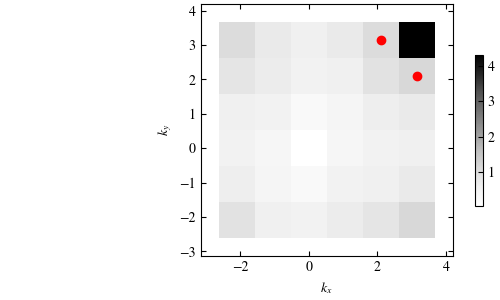

In [9]:
latt.plot_k(res_nosym.SpinT_eqK_sum)
plt.plot(*latt.k[n1], 'or')
plt.plot(*latt.k[n2], 'or')

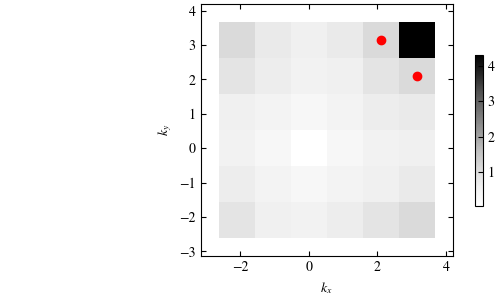

In [10]:
latt.plot_k(res_sym.SpinT_eqK_sum)
plt.plot(*latt.k[n1], 'or')
plt.plot(*latt.k[n2], 'or')